In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
filepath='/content/drive/MyDrive/Churn_Modelling.csv'

In [83]:
df=pd.read_csv(filepath)

In [84]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [86]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [88]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

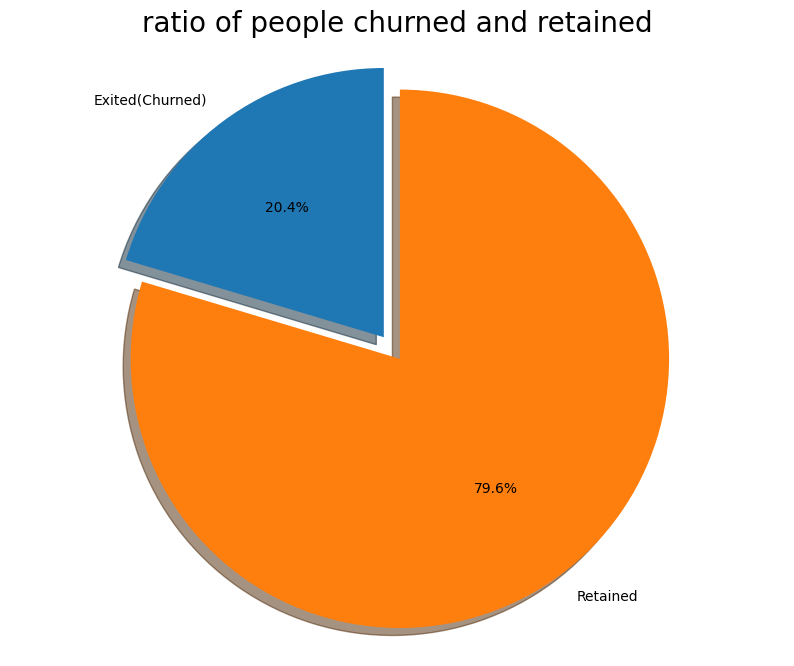

In [89]:
labels='Exited(Churned)','Retained'
sizes=[df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
explode=(0,0.1)
fig1,ax1=plt.subplots(figsize=(10,8))
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.title('ratio of people churned and retained',size=20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

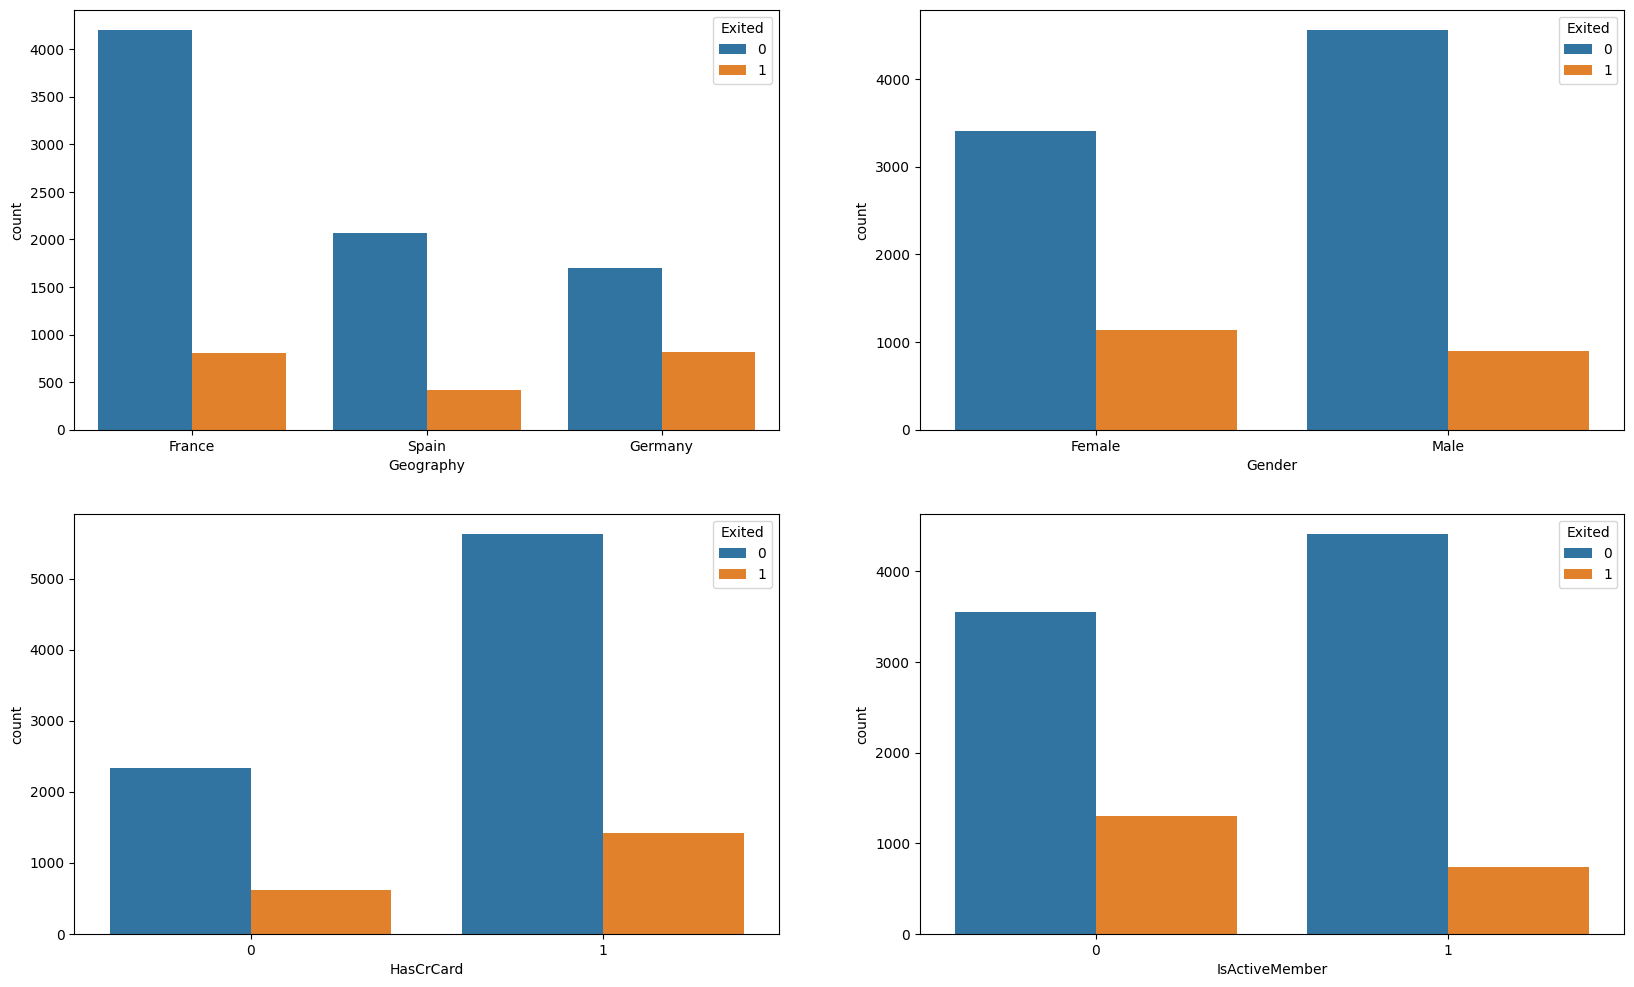

In [90]:
import seaborn as sns
fig,axarr=plt.subplots(2,2,figsize=(20,12))
sns.countplot(x='Geography',hue='Exited',data=df,ax=axarr[0][0])
sns.countplot(x='Gender',hue='Exited',data=df,ax=axarr[0][1])
sns.countplot(x='HasCrCard',hue='Exited',data=df,ax=axarr[1][0])
sns.countplot(x='IsActiveMember',hue='Exited',data=df,ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

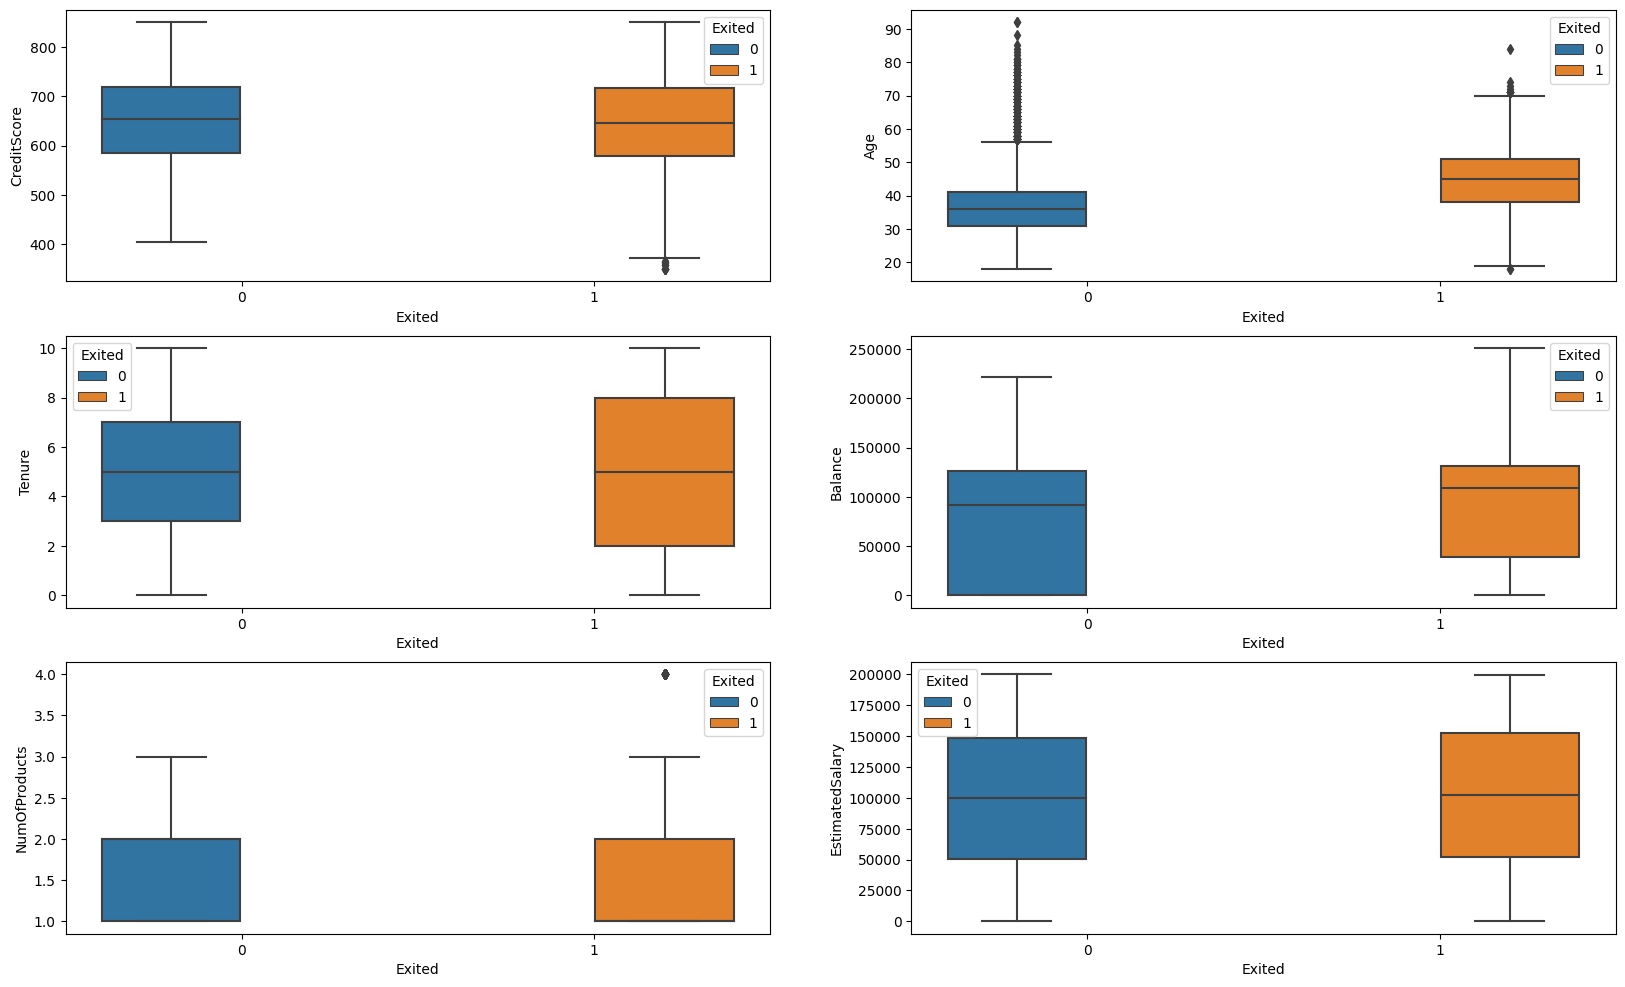

In [91]:
fig,axarr=plt.subplots(3,2,figsize=(20,12))
sns.boxplot(y='CreditScore',x='Exited',hue='Exited',data=df,ax=axarr[0][0])
sns.boxplot(y='Age',x='Exited',hue='Exited',data=df,ax=axarr[0][1])
sns.boxplot(y='Tenure',x='Exited',hue='Exited',data=df,ax=axarr[1][0])
sns.boxplot(y='Balance',x='Exited',hue='Exited',data=df,ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x='Exited',hue='Exited',data=df,ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x='Exited',hue='Exited',data=df,ax=axarr[2][1])

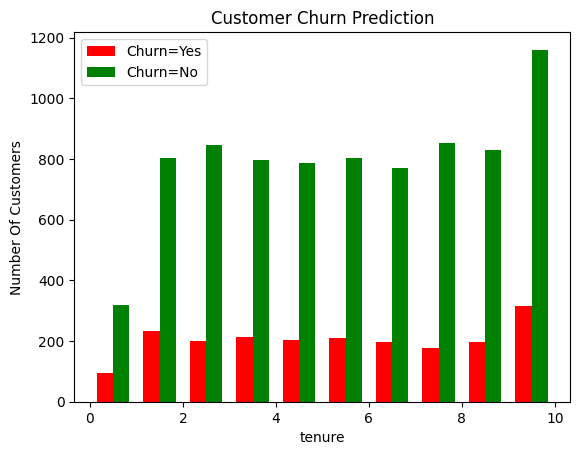

In [92]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.70, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

(-1.0, 5.0)

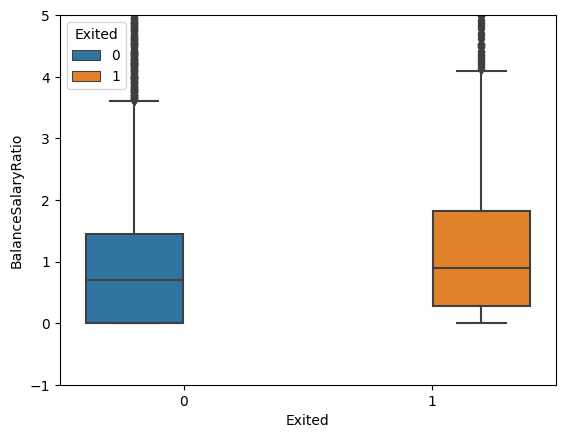

In [93]:
###Feature Engineering
df['BalanceSalaryRatio']=df.Balance/df.EstimatedSalary  ###Making a new column
sns.boxplot(y='BalanceSalaryRatio',x='Exited',hue='Exited',data=df)
plt.ylim(-1,5)

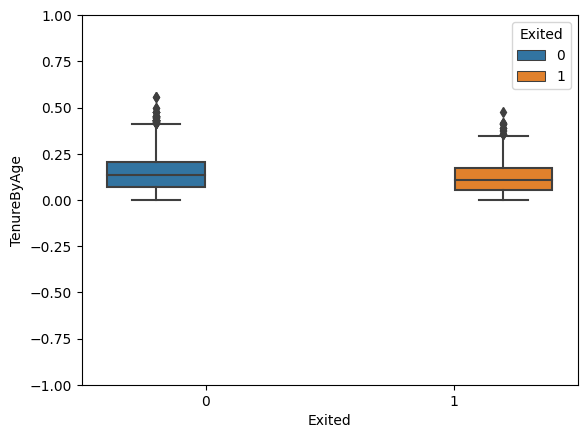

In [94]:
df['TenureByAge']=df.Tenure/(df.Age)   ###Making new column
sns.boxplot(y='TenureByAge',x='Exited',hue='Exited',data=df)
plt.ylim(-1,1)
plt.show()

In [95]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}')

In [96]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [97]:
###LABEL ENCODING
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [98]:
###ONE HOT ENCODING
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [99]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df1[scale_var] = sc.fit_transform(df1[scale_var])

In [100]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [101]:
x=df1.drop('Exited',axis='columns') ##independent features
y=df1['Exited'] ##dependent features
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [102]:
print(x_train)

      CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
7389        0.634       0  0.216216     0.5  0.000000       0.333333   
9275        0.154       1  0.324324     0.1  0.301642       0.000000   
2995        0.370       0  0.148649     0.2  0.447860       0.000000   
5316        0.608       1  0.297297     0.5  0.421221       0.000000   
356         1.000       0  0.527027     0.8  0.505290       0.333333   
...           ...     ...       ...     ...       ...            ...   
9225        0.488       0  0.189189     0.4  0.478581       0.333333   
4859        0.888       0  0.054054     0.4  0.456122       0.000000   
3264        0.776       1  0.229730     0.5  0.642787       0.333333   
9845        0.480       0  0.270270     0.9  0.000000       0.333333   
2732        0.546       0  0.405405     0.1  0.430758       0.000000   

      HasCrCard  IsActiveMember  EstimatedSalary  BalanceSalaryRatio  \
7389          1               0         0.819174            0.0

In [103]:
print(y_train)

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64


In [104]:
print(x_test)

      CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
9394        0.494       0  0.229730     0.8  0.522527       0.000000   
898         0.346       0  0.297297     0.2  0.410395       0.000000   
2398        0.712       0  0.324324     0.8  0.380182       0.000000   
5906        0.876       1  0.189189     0.4  0.446714       0.000000   
2343        0.712       1  0.270270     0.5  0.649805       0.333333   
...           ...     ...       ...     ...       ...            ...   
1037        0.550       0  0.081081     0.1  0.000000       0.333333   
2899        0.472       0  0.229730     0.7  0.000000       0.333333   
9549        0.456       1  0.243243     0.1  0.626820       0.333333   
2740        0.600       1  0.216216     0.4  0.567534       0.000000   
6690        0.446       1  0.162162     0.8  0.507802       0.000000   

      HasCrCard  IsActiveMember  EstimatedSalary  BalanceSalaryRatio  \
9394          1               1         0.964298            0.6

In [105]:
print(y_test)

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64


In [106]:
##MODEL IMPLEMENTATION
import tensorflow as tf
from tensorflow import keras

In [107]:
##adding hidden layers
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
model=keras.Sequential([keras.layers.Dense(12,input_shape=(None,32,14),activation='relu'),
                        keras.layers.Dense(6,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])

In [108]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, None, 32, 12)      180       
                                                                 
 dense_10 (Dense)            (None, None, 32, 6)       78        
                                                                 
 dense_11 (Dense)            (None, None, 32, 1)       7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5867 - accuracy: 0.7596
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7933
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7954
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7947
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7974
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8062
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8096
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8114
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4279 - accura

In [111]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8590


[0.34776926040649414, 0.859000027179718]

In [112]:
yp=model.predict(x_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.3504388 ],
       [0.36867964],
       [0.12695713],
       ...,
       [0.24807553],
       [0.291138  ],
       [0.28156382]], dtype=float32)

In [113]:
##converting the predictions of yp to 0,1 to check accuracy
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [114]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      1595
           1       0.71      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 14.722222222222216, 'Predicted values')

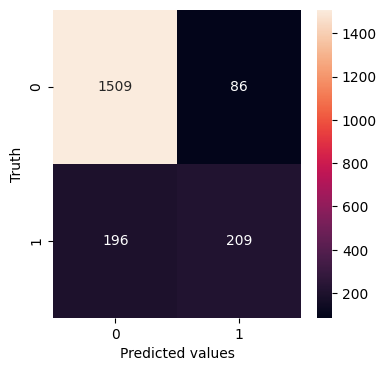

In [115]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True, fmt='g')
plt.ylabel('Truth')
plt.xlabel('Predicted values')

In [116]:
print('accuracy score=',accuracy_score(y_test,y_pred))

accuracy score= 0.859


In [117]:
##USING AUTO ML ALGORITHM

In [118]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [119]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G') ##h2o.init makes sure that no prior instance of h2o is running

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 34 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_unknownUser_h07qi6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.99 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [120]:
df=h2o.import_file('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [121]:
##splitting into train and test
df_train,df_test=df.split_frame(ratios=[.8])

In [122]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
11,1.57678e+07,Bearce,528,France,Male,31,6,102017,2,0,0,80181.1,0


In [123]:
df_test

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
15,1.56009e+07,Scott,635,Spain,Female,35,7,0,2,1,1,65951.6,0
17,1.57375e+07,Romeo,653,Germany,Male,58,1,132603,1,1,0,5097.67,1
25,1.5625e+07,Yen,846,France,Female,38,5,0,1,1,1,187616,0
26,1.57382e+07,Maclean,577,France,Male,25,3,0,2,0,1,124508,0
29,1.57287e+07,McWilliams,574,Germany,Female,43,3,141349,1,1,1,100187,0
30,1.56563e+07,Lucciano,411,France,Male,29,0,59697.2,2,1,1,53483.2,0
34,1.56594e+07,Maggard,520,Spain,Female,42,6,0,2,1,1,34410.6,0
42,1.57381e+07,Clarke,465,France,Female,51,8,122522,1,0,0,181298,1
44,1.57552e+07,Lavine,834,France,Female,49,2,131395,1,0,0,194366,1


In [124]:
y='Exited'  #y is dependent variable
x=df.columns #x is independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

In [125]:
aml=H2OAutoML(max_runtime_secs=300,max_models=10,nfolds=0,verbosity='info')

In [126]:
aml.train(x=x,y=y,training_frame=df_train)

AutoML progress: |
17:32:08.628: Project: AutoML_2_20230720_173208
17:32:08.628: Cross-validation disabled by user: no fold column nor nfolds > 1.
17:32:08.628: Setting stopping tolerance adaptively based on the training frame: 0.011188034306951495
17:32:08.628: Build control seed: -1 (random)
17:32:08.629: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
17:32:08.743: training frame: Frame key: AutoML_2_20230720_173208_training_py_11_sid_af24    cols: 14    rows: 7220  chunks: 8    size: 467074  checksum: -7454596117647480325
17:32:08.747: validation frame: Frame key: AutoML_2_20230720_173208_validation_py_11_sid_af24    cols: 14    rows: 769  chunks: 8    size: 270324  checksum: 427647633669278688
17:32:08.747: leaderboard frame: Frame key: AutoML_2_20230720_173208_validation_py_11_sid_af24    cols: 14    rows: 769  chunks: 8    size: 270324  checksum: 42764763

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20230720_173208


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.07987763367677564
RMSE: 0.28262631455116777
MAE: 0.18408801947169753
RMSLE: 0.1978408353700399
Mean Residual Deviance: 0.07987763367677564

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.09965116671794903
RMSE: 0.31567573032773527
MAE: 0.2064270012170403
RMSLE: 0.22106889444224295
Mean Residual Deviance: 0.09965116671794903

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-07-20 17:32:34  0.002 sec   0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2023-07-20 17:32:35  0.976 sec   5                  0.327058         0.262761        0.106967             0.330249           0.263676          0.109064
    2023-07-20 17:32:36  1.283 sec   10                 0.306528         0.208924        0.0939594            0.315546           0.212379          0.0995693
    2023-07-20 17:32:36  1.482 sec   15                 0.301188         0.197838        0.0907143            0.314383           0.204635          0.0988368
    2023-07-20 17:32:36  1.805 sec   20                 0.295687         0.192634        0.0874306            0.314601           0.20317           0.0989736
    2023-07-20 17:32:36  2.002 sec   25                 0.291677         0.18985         0.0850754            0.314217           0.203223          0.0987326
    2023-07-20 17:32:37  2.229 sec   30                 0.287833         0.188027        0.0828481            0.315689           0.206411          0.0996593
    2023-07-20 17:32:37  2.706 sec   35                 0.282626         0.184088        0.0798776            0.315676           0.206427          0.0996512

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
Age                307.057                1                    0.300145
NumOfProducts      267.577                0.871422             0.261553
Balance            149.121                0.485645             0.145764
IsActiveMember     71.9887                0.234447             0.0703681
CreditScore        66.9145                0.217922             0.0654081
EstimatedSalary    58.577                 0.190769             0.0572583
Geography.Germany  45.2176                0.147261             0.0441996
Tenure             23.0973                0.0752216            0.0225774
Gender.Female      17.1342                0.0558012            0.0167484
Geography.France   7.95549                0.0259088            0.0077764
HasCrCard          3.02532                0.00985263           0.00295722
Geography.Spain    2.81742                0.00917554           0.00275399
Gender.Male        2.54776                0.00829734           0.00249041

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [127]:
LB=aml.leaderboard ##seeing the leaderboard of all the models
LB

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_3_AutoML_2_20230720_173208,0.315676,0.0996512,0.206427,0.221069,0.0996512
GBM_2_AutoML_2_20230720_173208,0.321293,0.103229,0.210873,0.225299,0.103229
GBM_1_AutoML_2_20230720_173208,0.321511,0.103369,0.211658,0.225908,0.103369
GBM_3_AutoML_2_20230720_173208,0.322529,0.104025,0.20961,0.225929,0.104025
GBM_4_AutoML_2_20230720_173208,0.323808,0.104852,0.210178,0.227553,0.104852
DRF_1_AutoML_2_20230720_173208,0.331591,0.109952,0.215076,0.234966,0.109952
XRT_1_AutoML_2_20230720_173208,0.332649,0.110655,0.237755,0.235843,0.110655
XGBoost_2_AutoML_2_20230720_173208,0.345646,0.119471,0.23506,0.249388,0.119471
XGBoost_1_AutoML_2_20230720_173208,0.351306,0.123416,0.242175,0.255192,0.123416
GLM_1_AutoML_2_20230720_173208,0.368564,0.13584,0.277847,0.259232,0.13584


In [128]:
model_id=list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_id

['XGBoost_3_AutoML_2_20230720_173208',
 'GBM_2_AutoML_2_20230720_173208',
 'GBM_1_AutoML_2_20230720_173208',
 'GBM_3_AutoML_2_20230720_173208',
 'GBM_4_AutoML_2_20230720_173208',
 'DRF_1_AutoML_2_20230720_173208',
 'XRT_1_AutoML_2_20230720_173208',
 'XGBoost_2_AutoML_2_20230720_173208',
 'XGBoost_1_AutoML_2_20230720_173208',
 'GLM_1_AutoML_2_20230720_173208']

In [129]:
aml.leader.model_performance(df_test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.10306675985639578
RMSE: 0.3210401218794869
MAE: 0.21035307485835206
RMSLE: 0.22528824932932737
Mean Residual Deviance: 0.10306675985639578

In [130]:
aml.leader

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20230720_173208


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.07987763367677564
RMSE: 0.28262631455116777
MAE: 0.18408801947169753
RMSLE: 0.1978408353700399
Mean Residual Deviance: 0.07987763367677564

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.09965116671794903
RMSE: 0.31567573032773527
MAE: 0.2064270012170403
RMSLE: 0.22106889444224295
Mean Residual Deviance: 0.09965116671794903

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-07-20 17:32:34  0.002 sec   0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2023-07-20 17:32:35  0.976 sec   5                  0.327058         0.262761        0.106967             0.330249           0.263676          0.109064
    2023-07-20 17:32:36  1.283 sec   10                 0.306528         0.208924        0.0939594            0.315546           0.212379          0.0995693
    2023-07-20 17:32:36  1.482 sec   15                 0.301188         0.197838        0.0907143            0.314383           0.204635          0.0988368
    2023-07-20 17:32:36  1.805 sec   20                 0.295687         0.192634        0.0874306            0.314601           0.20317           0.0989736
    2023-07-20 17:32:36  2.002 sec   25                 0.291677         0.18985         0.0850754            0.314217           0.203223          0.0987326
    2023-07-20 17:32:37  2.229 sec   30                 0.287833         0.188027        0.0828481            0.315689           0.206411          0.0996593
    2023-07-20 17:32:37  2.706 sec   35                 0.282626         0.184088        0.0798776            0.315676           0.206427          0.0996512

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
Age                307.057                1                    0.300145
NumOfProducts      267.577                0.871422             0.261553
Balance            149.121                0.485645             0.145764
IsActiveMember     71.9887                0.234447             0.0703681
CreditScore        66.9145                0.217922             0.0654081
EstimatedSalary    58.577                 0.190769             0.0572583
Geography.Germany  45.2176                0.147261             0.0441996
Tenure             23.0973                0.0752216            0.0225774
Gender.Female      17.1342                0.0558012            0.0167484
Geography.France   7.95549                0.0259088            0.0077764
HasCrCard          3.02532                0.00985263           0.00295722
Geography.Spain    2.81742                0.00917554           0.00275399
Gender.Male        2.54776                0.00829734           0.00249041

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [131]:
y_pred=aml.leader.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [132]:
y_pred

predict
1.0863
0.0572745
1.15645
0.245072
-0.013406
0.239664
-0.0599266
0.0692492
0.651607
0.534965
